In [12]:
import sys
sys.path.append("../")
import analysis
import numpy as np
import matplotlib.pyplot as plt
laser = analysis.System("sagnac", ["../../data/20250409/Pin_40_22mW_Signal/iter_" + str(x) + ".tdms" for x in range(501, 522)] + ["../../data/20250409/Pin_68_70mW_Signal/iter_" + str(x) + ".tdms" for x in range(85, 106)] + ["../../data/20250408/Pin_102_30mW_Signal/iter_" + str(x) + ".tdms" for x in range(179, 200)] + ["../../data/20250409/Pin_40_22mW_Noise/iter_" + str(x) + ".tdms" for x in range(565, 586)] + ["../../data/20250409/Pin_68_70mW_Noise/iter_" + str(x) + ".tdms" for x in range(142, 163)] + ["../../data/20250408/Pin_102_30mW_Noise/iter_" + str(x) + ".tdms" for x in range(241, 262)], channel = "X", set_data = True)

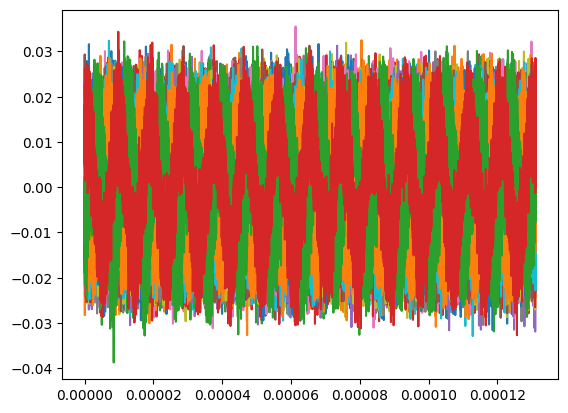

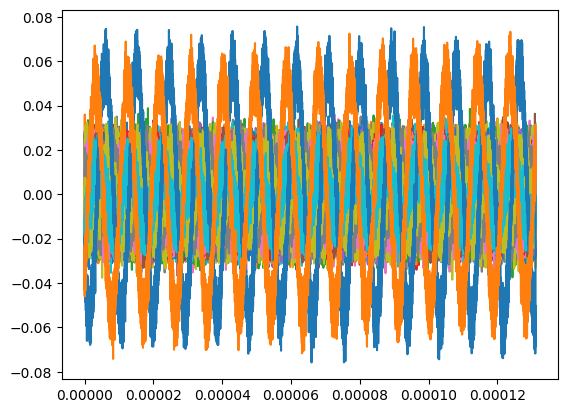

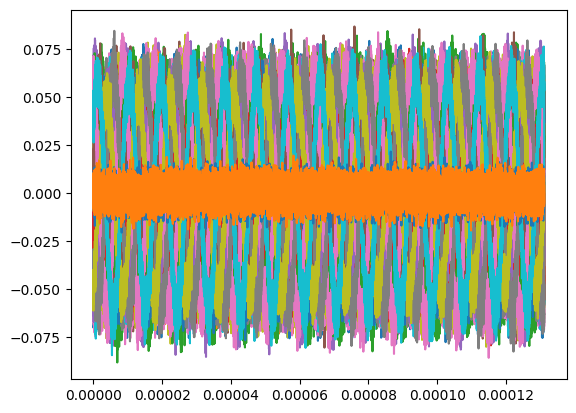

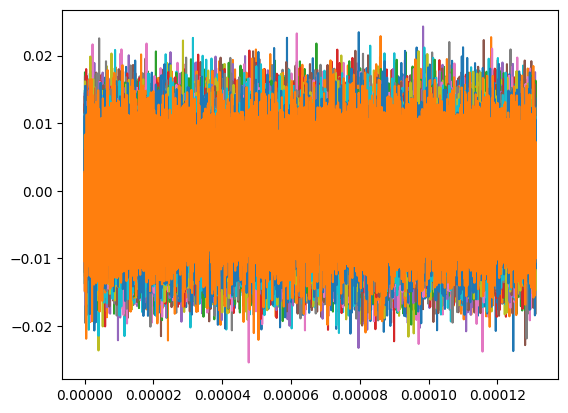

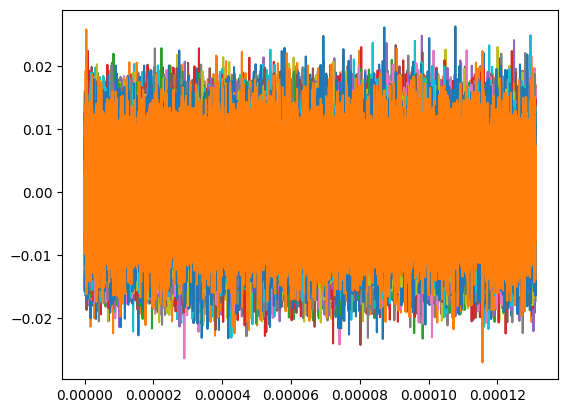

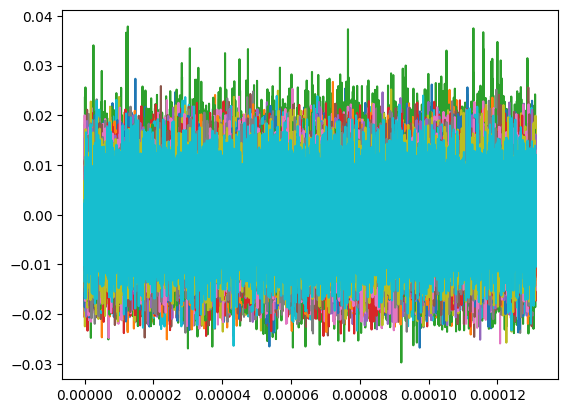

In [33]:
for i, d in enumerate(laser.get_data()):
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    for col in d.collection:
        plt.plot(col.t, col.x)
    if i != 0 and i % 21 == 0:
        plt.show()
    laser.set_data(ind = i)

In [1]:
import sys
sys.path.append("../")
import analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
laser = analysis.System("sagnac", ["../../data/20250410/Pin_71_10mW_pm186uW_ext_386uW_pm38uW_Signal/iter_" + str(x) + ".tdms" for x in range(32, 52)] + ["../../data/20250410/Pin_71_10mW_pm186uW_ext_386uW_pm38uW_Noise/iter_" + str(x) + ".tdms" for x in range(0, 20)], channel = "X", set_data = True)

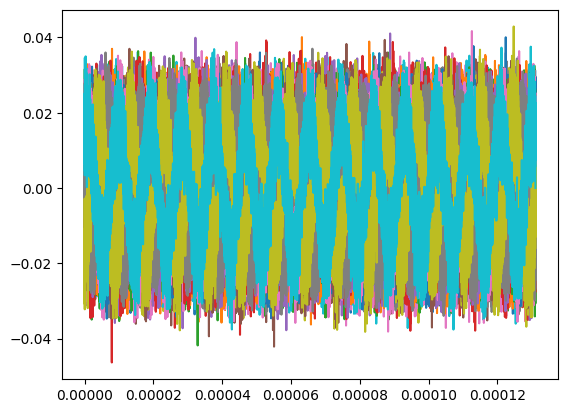

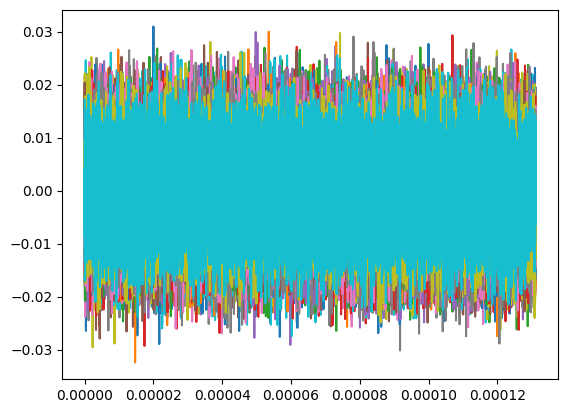

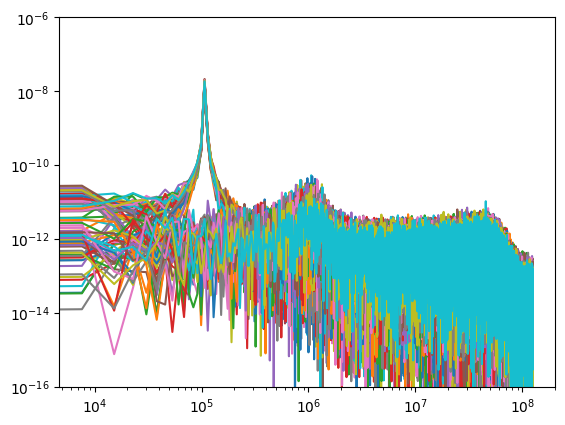

In [17]:
freqs = np.array([])
psds = np.array([])
for i, d in enumerate(laser.get_data()):
    d.apply("detrend", mode = "linear", inplace = True)
    # d.apply("bin_average", Npts = int(d.r / (2 * 1e6)), inplace = True)
    # d.apply("lowpass", cutoff = 1e6, inplace = True)
    for j, c in enumerate(d.collection):
        f, x = periodogram(c.x, laser.get_data()[i].r, nfft = 2**15)
        plt.plot(c.t, c.x)
        if i == 0 and j == 0:
            freqs = np.append(freqs, f)
            psds = np.append(psds, x)
        else:
            freqs = np.vstack((freqs, f))
            psds = np.vstack((psds, x))
    if i == 19:
        plt.show()
    laser.set_data(ind = i)
plt.show()

for i in range(len(freqs)):
    plt.loglog(freqs[i], psds[i])
plt.ylim(1e-16, 1e-6)
plt.show()

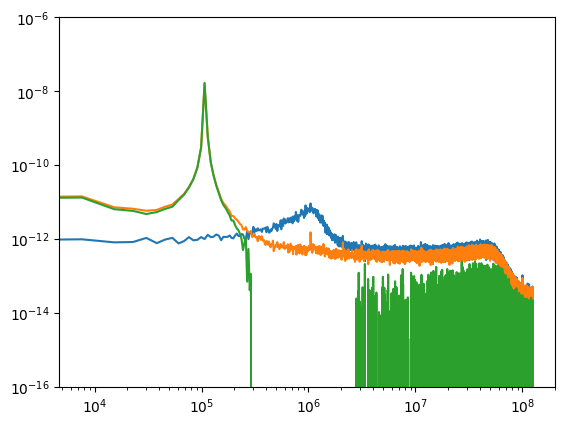

6.130692517491197
4.732255502496784


In [24]:
avg_freqs = np.mean(freqs, axis = 0)
avg_noise = np.mean(psds[40:], axis = 0)
avg_signal_s = np.mean(psds[:40], axis = 0) - avg_noise
avg_signal = np.mean(psds[:40], axis = 0)
# for i in range(40, len(freqs)):
#     plt.loglog(freqs[i], psds[i])
# plt.ylim(1e-16, 1e-6)
# plt.show()
# for i in range(40):
#     plt.loglog(freqs[i], psds[i])
# plt.ylim(1e-16, 1e-6)
# plt.show()
plt.loglog(avg_freqs, avg_noise)
plt.loglog(avg_freqs, avg_signal)
plt.loglog(avg_freqs, avg_signal_s)
plt.ylim(1e-16, 1e-6)
plt.show()
print(20 * np.log10(np.sum(avg_signal) / np.sum(avg_noise)))
print(20 * np.log10(np.mean(avg_signal) / np.std(avg_noise)))